In [64]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import binom
from scipy.stats import linregress

import statsmodels.formula.api as smf

#Sampling and point estimates

dataset: Coffee rating

* Each row represents 1 coffee

* 1338 rows

In [66]:
#For VScode
#coffee_ratings = pd.read_feather(r'D:\sem 2 year 3\DataCamp\DA track git\Google_Colab_DataCamp_Data_Analyst\Sampling in Python\Dataset\coffee_ratings_full.feather' )


#spotify_population = pd.read_feather(r'D:\sem 2 year 3\DataCamp\DA track git\Google_Colab_DataCamp_Data_Analyst\Sampling in Python\Dataset\spotify_2000_2020.feather' )
#For colab
coffee_ratings = pd.read_feather(r'/content/drive/MyDrive/DataCamp and Linkedin Learning/CAREER TRACK Data Analyst with Python/Dataset/Introduction to Sampling/coffee_ratings_full.feather')

spotify_population = pd.read_feather(r'/content/drive/MyDrive/DataCamp and Linkedin Learning/CAREER TRACK Data Analyst with Python/Dataset/Introduction to Sampling/spotify_2000_2020.feather')

In [67]:
pts_vs_flavor_pop = coffee_ratings[["total_cup_points", "flavor"]]

In [68]:
pts_vs_flavor_samp = pts_vs_flavor_pop.sample(n=10 )

*Using `.sample()` in a Pandas Series*

In [69]:
cup_points_samp = coffee_ratings['total_cup_points'].sample(n=10)


##Population parameters & point estimates

In [70]:
np.mean(pts_vs_flavor_pop['total_cup_points'])


82.15120328849028

**a point estimate/sample statistic**: is a calculation based on the sample dataset

###Simple sampling with pandas

Datatset: 

Throughout this chapter, you'll be exploring song data from Spotify. Each row of this population dataset represents a song, and there are over 40,000 rows. Columns include the song name, the artists who performed it, the release year, and attributes of the song like its duration, tempo, and danceability. You'll start by looking at the durations.

Your first task is to sample the Spotify dataset and compare the mean duration of the population with the sample.

spotify_population is available and pandas is loaded as pd

In [71]:
#For VScode
#spotify_population = pd.read_feather(r'D:\sem 2 year 3\DataCamp\DA track git\Google_Colab_DataCamp_Data_Analyst\Sampling in Python\Dataset\spotify_2000_2020.feather' )

#For colab
spotify_population = pd.read_feather(r'/content/drive/MyDrive/DataCamp and Linkedin Learning/CAREER TRACK Data Analyst with Python/Dataset/Introduction to Sampling/spotify_2000_2020.feather')


In [72]:
# Sample 1000 rows from spotify_population
spotify_sample = spotify_population.sample(n=1000)

# Print the sample
print(spotify_sample)

# Calculate the mean duration in mins from spotify_population
mean_dur_pop = np.mean(spotify_population['duration_minutes'])


# Calculate the mean duration in mins from spotify_sample
mean_dur_samp = np.mean(spotify_sample['duration_minutes'])

# Print the means
print(mean_dur_pop)
print(mean_dur_samp)

       acousticness                                      artists  \
560         0.27900                                 ['Makaveli']   
25266       0.00324                              ['Talib Kweli']   
35579       0.01820                               ['X-Ray Spex']   
30034       0.40800                             ['Jack Johnson']   
16392       0.13800                             ['O.T. Genasis']   
...             ...                                          ...   
25626       0.90900                           ['Sufjan Stevens']   
10948       0.00427                            ['Dwight Yoakam']   
1036        0.24900                              ['Fidel Rueda']   
39059       0.23500                                   ['Prince']   
13257       0.13200  ['A.B. Quintanilla III Y Los Kumbia Kings']   

       danceability  duration_ms  duration_minutes  energy  explicit  \
560           0.591     277227.0          4.620450   0.918       1.0   
25266         0.662     227427.0       

###Simple sampling and calculating with NumPy

You can also use numpy to calculate parameters or statistics from a list or pandas Series.

You'll be turning it up to eleven and looking at the loudness property of each song.

spotify_population is available and numpy is loaded as np.

In [73]:
# Create a pandas Series from the loudness column of spotify_population
loudness_pop = spotify_population['loudness']

# Sample 100 values of loudness_pop
loudness_samp = loudness_pop.sample(n=100)

# Calculate the mean of loudness_pop
mean_loudness_pop = np.mean(loudness_pop)

# Calculate the mean of loudness_samp
mean_loudness_samp =  np.mean(loudness_samp)

# Print the means
print(mean_loudness_pop)
print(mean_loudness_samp)

-7.366856851353947
-6.56114


#Convenience sampling


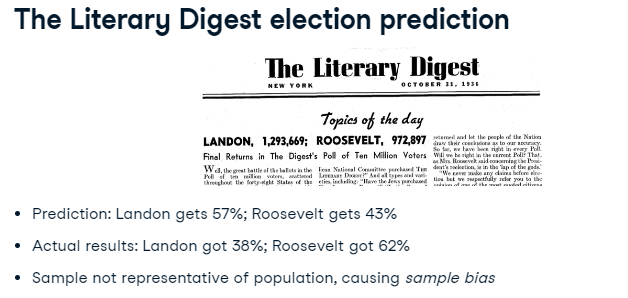

The sample bias: vào năm 1936 Tờ báo the LIterary Digest chạy 1 poll vs 10 triệu người vs tỉ lệ người vote cho Lanon. 

Tuy nhiên vì học phỏng vấn qua điện thoại- thứ mà chỉ có người giàu mới có đã khiến cho **sample bias**. Sample ko đại diện cho population

In [74]:
coffee_ratings["total_cup_points"].mean()


82.15120328849028

In [75]:
coffee_ratings_first10 = coffee_ratings.head(10)
coffee_ratings_first10["total_cup_points"].mean()


89.1

##Visualizing selection bias

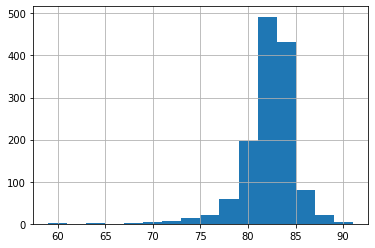

In [76]:
coffee_ratings["total_cup_points"].hist(bins = np.arange(59,93,2)) #index của python dừng ở số cuối -1, nên range từ 59>91+2
plt.show()

##Visualizing selection bias for a random sample

<AxesSubplot:>

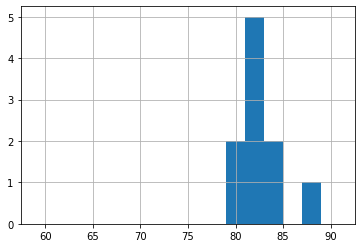

In [77]:
coffee_samples = coffee_ratings.sample(n = 10)
coffee_samples["total_cup_points"].hist(bins = np.arange(59,91+2,2))

###Are findings from the sample generalizable?


You just saw how convenience sampling—collecting data using the easiest method—can result in samples that aren't representative of the population. Equivalently, this means findings from the sample are not generalizable to the population. Visualizing the distributions of the population and the sample can help determine whether or not the sample is representative of the population.

The Spotify dataset contains an acousticness column, which is a confidence measure from zero to one of whether the track was made with instruments that aren't plugged in. You'll compare the acousticness distribution of the total population of songs with a sample of those songs.

spotify_population and spotify_mysterious_sample are available; pandas as pd, matplotlib.pyplot as plt, and numpy as np are loaded.

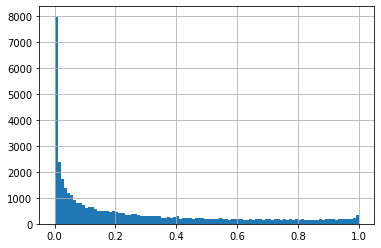

In [78]:
spotify_population["acousticness"].hist(bins = np.arange(0,1.01, 0.01))
plt.show()

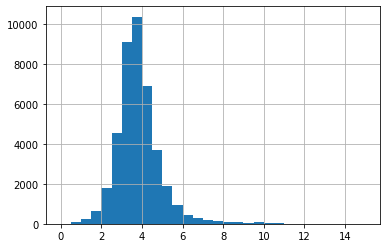

In [79]:
# Visualize the distribution of duration_minutes as a histogram
spotify_population['duration_minutes'].hist(bins = np.arange(0,15.5, 0.5))
plt.show()

#Pseudo-random number generation
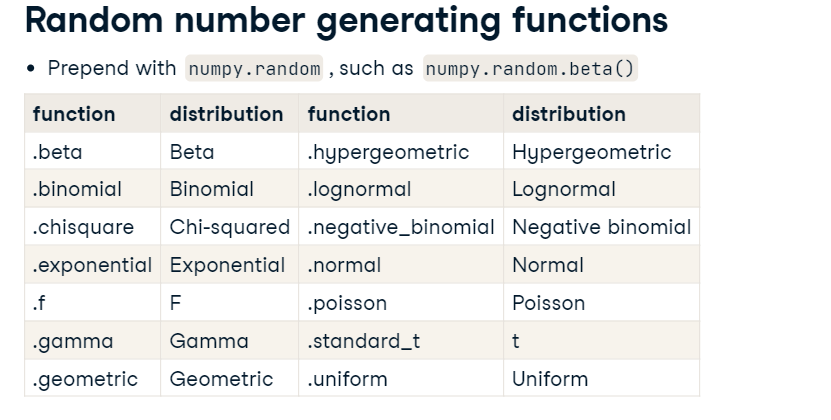

In [80]:
randoms = np.random.beta(a=2,b=2, size = 5000)
randoms
#random number generated from the beta distribution

array([0.42602175, 0.55339652, 0.76406137, ..., 0.63524438, 0.49329386,
       0.4193465 ])

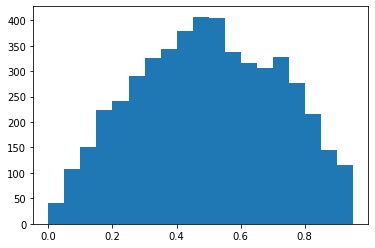

In [81]:
plt.hist(randoms, bins= np.arange(0,1,0.05))
plt.show()

###Random number seed

In [82]:
np.random.seed(20000229)
np.random.normal(loc =2, scale =1.5,size=2)

array([-0.59030264,  1.87821258])

In [ ]:
#Chạy lại ra số random tiếp theo của cái seed đó
np.random.normal(loc =2, scale =1.5,size=2)


###Generating random numbers

You've used .sample() to generate pseudo-random numbers from a set of values in a DataFrame. A related task is to generate random numbers that follow a statistical distribution, like the uniform distribution or the normal distribution.

Each random number generation function has distribution-specific arguments and an argument for specifying the number of random numbers to generate.

matplotlib.pyplot is loaded as plt, and numpy is loaded as np.

In [85]:
uniforms = np.random.uniform(low=-3, high=3, size=5000)
normals = np.random.normal(loc=5, scale=2, size=5000)


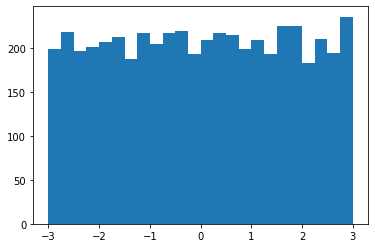

In [86]:
# Generate random numbers from a Uniform(-3, 3)
uniforms = np.random.uniform(low=-3, high=3, size=5000)

# Plot a histogram of uniform values, binwidth 0.25
plt.hist(uniforms, bins = np.arange(-3,3.25,0.25))
plt.show()

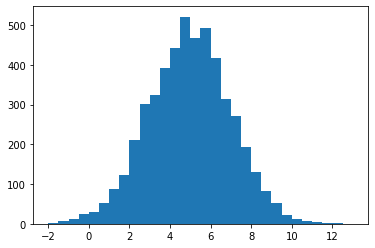

In [87]:
# Generate random numbers from a Normal(5, 2)
normals = np.random.normal(loc=5, scale=2, size=5000)

# Plot a histogram of normal values, binwidth 0.5
plt.hist(normals, bins= np.arange(-2,13.5,0.5))
plt.show()